In [21]:
from mpmath import *
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# function to expand
def f(x):
  return log(x)

# point of expansion
x0 = 1

# pade series orders
n = 10
m = 10

In [23]:
a = taylor(f, x0, n+m+1)
p, q = pade(a, n, m)

In [24]:
def fp(x):
  return polyval(p[::-1], x-x0)/polyval(q[::-1], x-1)
def ft(x):
  return polyval(a[::-1], x-x0)

In [29]:
def stringify(p, v):
  nom = [str(p[0])]
  term = '('+v+'-'+str(x0)+')'
  for i in range(1,len(p)):
    nom.append(str(p[i]) + '*'+ term+'^' + str(i))
  return '+'.join(nom)

def fparse(p,q, v):
  return '('+stringify(p, v)+')/('+stringify(q, v)+')'

In [32]:
print('logc:=' + fparse(p, q, 'c'))

logc:=(0.0+1.0*(c-1)^1+4.49989824587848*(c-1)^2+8.49081559313295*(c-1)^3+8.71861198702169*(c-1)^4+5.28840582083041*(c-1)^5+1.92397686743184*(c-1)^6+0.406962576893115*(c-1)^7+0.0459296114400872*(c-1)^8+0.00229612887471531*(c-1)^9+3.16917432803896e-5*(c-1)^10)/(1.0+4.99989824587848*(c-1)^1+10.6574313827389*(c-1)^2+12.630694929765*(c-1)^3+9.10125071960289*(c-1)^4+4.09541544715398*(c-1)^5+1.13756674795188*(c-1)^6+0.185715582786268*(c-1)^7+0.0160705158688754*(c-1)^8+0.000595156240499251*(c-1)^9+5.40993966483769e-6*(c-1)^10)


In [34]:
print('log1c:=' + fparse(p, q, '(1-c)'))

log1c:=(0.0+1.0*((1-c)-1)^1+4.49989824587848*((1-c)-1)^2+8.49081559313295*((1-c)-1)^3+8.71861198702169*((1-c)-1)^4+5.28840582083041*((1-c)-1)^5+1.92397686743184*((1-c)-1)^6+0.406962576893115*((1-c)-1)^7+0.0459296114400872*((1-c)-1)^8+0.00229612887471531*((1-c)-1)^9+3.16917432803896e-5*((1-c)-1)^10)/(1.0+4.99989824587848*((1-c)-1)^1+10.6574313827389*((1-c)-1)^2+12.630694929765*((1-c)-1)^3+9.10125071960289*((1-c)-1)^4+4.09541544715398*((1-c)-1)^5+1.13756674795188*((1-c)-1)^6+0.185715582786268*((1-c)-1)^7+0.0160705158688754*((1-c)-1)^8+0.000595156240499251*((1-c)-1)^9+5.40993966483769e-6*((1-c)-1)^10)


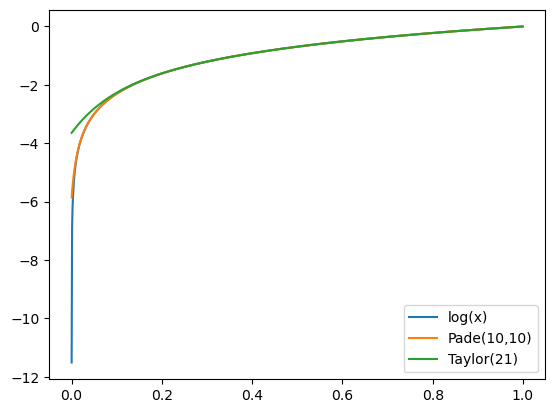

In [28]:
# plot the approximants and the function
x = np.arange(1e-5,1,1e-3)
y = np.log(x)
yp = fp(x)
yt = ft(x)
plt.plot(x,y, label="log(x)")
plt.plot(x,yp, label="Pade("+str(n)+","+str(m)+")")
plt.plot(x,yt, label="Taylor("+str(n+m+1)+")")
plt.legend(loc='lower right')
plt.show()